<a href="https://colab.research.google.com/github/Yashasvi2003/Machine-Learning-Algorithms/blob/main/KNN-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

In [8]:
data=pd.read_csv('Wine Quality Dataset.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('quality', axis=1)
y = data['quality']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize k-NN regressor with k=5
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the regressor
knn_regressor.fit(X_train, y_train)

# Predict the quality scores for the test set
y_pred_reg = knn_regressor.predict(X_test)

# Evaluate the regression model
mse = mean_squared_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)
print(f'Regression Mean Squared Error (MSE): {mse:.2f}')
print(f'Regression R-squared (R²): {r2:.2f}')

Regression Mean Squared Error (MSE): 0.48
Regression R-squared (R²): 0.38


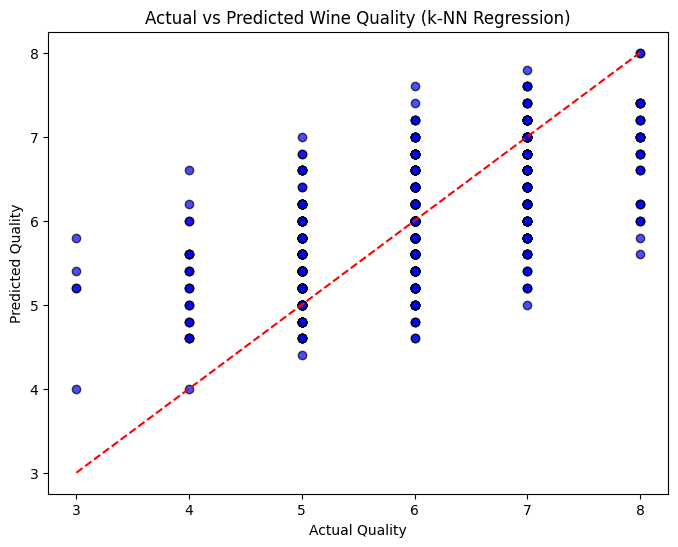

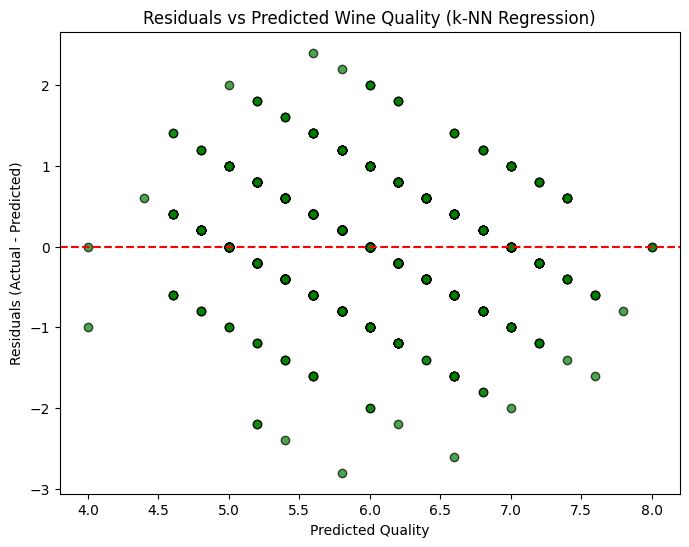

In [21]:
import matplotlib.pyplot as plt
# Plotting Actual vs Predicted Quality
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_reg, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Wine Quality (k-NN Regression)')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.show()

# Plotting Residuals (Errors)
residuals = y_test - y_pred_reg

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_reg, residuals, color='green', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Wine Quality (k-NN Regression)')
plt.xlabel('Predicted Quality')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()
